Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [122]:
#HIERACHICAL CLUSTERING LIBRARIES

from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch

In [123]:
cm2=pd.read_csv("E:\DATA SCIENCE\LMS\ASSIGNMENT\MY ASSIGNMENT\CLUSTERING\crime_data.csv")

In [124]:
cm=cm2.rename({'Unnamed: 0':'place'},axis=1)
cm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [125]:
CM=cm.iloc[:,1:5]

In [126]:
CM

,Balance,Qual_miles,cc1_miles,cc2_miles
0,28143,0,1,1
1,19244,0,1,1
2,41354,0,1,1
3,14776,0,1,1
4,97752,0,4,1
...,...,...,...,...
3994,18476,0,1,1
3995,64385,0,1,1
3996,73597,0,3,1
3997,54899,0,1,1


In [127]:
#normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [128]:
#normalization data frame
norm = norm_func(CM)

In [129]:
norm

,Balance,Qual_miles,cc1_miles,cc2_miles
0,0.016508,0.0,0.00,0.0
1,0.011288,0.0,0.00,0.0
2,0.024257,0.0,0.00,0.0
3,0.008667,0.0,0.00,0.0
4,0.057338,0.0,0.75,0.0
...,...,...,...,...
3994,0.010837,0.0,0.00,0.0
3995,0.037766,0.0,0.00,0.0
3996,0.043169,0.0,0.50,0.0
3997,0.032202,0.0,0.00,0.0


In [ ]:
#creating dendrogram
dendrogram=sch.dendrogram(sch.linkage(norm,method='single'))

In [ ]:
#creating clusters
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [ ]:
hc

In [ ]:
#Save clusers for chart
y_hc = hc.fit_predict(norm)

In [ ]:
y_hc

In [ ]:
#converting numpy array in pandas series
mc=pd.Series(y_hc)

In [ ]:
mc

In [ ]:
#create a dataframe
cl=pd.DataFrame(y_hc,columns=['clusters'])

In [ ]:
pd.concat([cm,cl],axis=1)

In [ ]:
# Perform K-Means clusering
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# we already perform Normalizaion so now make a model
modelc=KMeans(n_clusters=3).fit(norm)

In [ ]:
#getting labels of clusters assigned to each row
modelc.labels_

In [ ]:
#converting numpy array in pandas series
mc=pd.Series(modelc.labels_)

In [ ]:
#creating new column assign it to new column
cm['cust']=mc

In [ ]:
cm

In [195]:
cm.groupby(cm.cust).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cust,,,,,,,,,,,,
0,1911.655518,78955.653289,120.775920,2.683389,1.002230,1.011148,17243.479376,16.023411,294.098105,0.841695,4311.947603,0.433668
1,2213.462211,50222.677588,144.430319,1.000000,1.024028,1.004369,3963.703801,6.663609,461.894277,1.385758,3753.799476,0.248143
2,1569.364084,133516.333333,168.975400,4.354244,1.001230,1.035670,54147.504305,20.627306,637.984010,1.926199,4932.170972,0.644526


#As we can see from above result, average Murder is highest belongs to cluster 1.
average Assault is highest belongs to cluster 0.
average Urbanpop is highest belongs to cluster 2.
average Rape is highest belongs to cluster 0.


In [ ]:
#load libray of DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#as we already performed NOrmalizaton in variable norm
#assume eps=0.8 and as columns is 4 minsample=5
dbscan = DBSCAN(eps=0.8,min_samples=5)
dbscan.fit(norm)

In [ ]:
dbscan.labels_

In [ ]:
#converting numpy array in pandas series
mcDB=pd.Series(dbscan.labels_)

In [ ]:
#make a Dataframe and assigned new column for each row
dbscan3=pd.DataFrame(mcDB,columns=['clust'])

In [ ]:
Checkclust=pd.concat([cm.iloc[:,0:4],dbscan3],axis=1)

In [173]:
Checkclust

,ID#,Balance,Qual_miles,cc1_miles,clust
0,1,28143,0,1,0
1,2,19244,0,1,0
2,3,41354,0,1,0
3,4,14776,0,1,0
4,5,97752,0,4,0
...,...,...,...,...,...
3994,4017,18476,0,1,0
3995,4018,64385,0,1,0
3996,4019,73597,0,3,0
3997,4020,54899,0,1,0


#Q-2 Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [ ]:
#HIERACHICAL CLUSTERING LIBRARIES

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch

In [ ]:
ew=pd.read_csv("E:\DATA SCIENCE\LMS\ASSIGNMENT\MY ASSIGNMENT\CLUSTERING\EastWestAirlines.csv")

In [ ]:
ew

In [206]:
ew1=ew.iloc[:,1:12]
ew1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
def nomr_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)
norm5=norm_func(ew1)

In [ ]:
norm5

In [ ]:
hc1=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

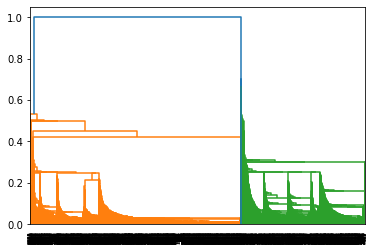

In [192]:
#creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(norm5,method='single'))

In [ ]:
y_hc1=hc1.fit_predict(norm5)

In [181]:
y_hc1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [182]:
clusters1=pd.DataFrame(y_hc1,columns=['cluster'])

In [183]:
pd.concat([ew,clusters1],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterKmeans,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1


In [184]:
# Perform K-Means clusering
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.preprocessing import StandardScaler

In [185]:
# As we already load file and normalizaton function.Perform KMeans clustering model
model_e=KMeans(n_clusters=5).fit(norm5)

In [186]:
#getting labels of clusters assigned to each row
model_e.labels_

array([4, 4, 4, ..., 3, 0, 0])

In [187]:
#convering numpy array into pandas series object
md3=pd.Series(model_e.labels_)

In [188]:
md3

0       4
1       4
2       4
3       4
4       3
       ..
3994    1
3995    1
3996    3
3997    0
3998    0
Length: 3999, dtype: int32

In [189]:
#creating new column and assign it to each row
ew['clusterKmeans']=md3

In [190]:
ew.iloc[0:14]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterKmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,4
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,3


In [200]:
ew.iloc[:,1:12].groupby(ew.clusterKmeans).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterKmeans,,,,,,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0


In [202]:
#DBscan load library
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
#we already load data so make array 
array3=ew1.values

In [210]:
stscaler=StandardScaler().fit(array3)
x= stscaler.transform(array3)

In [208]:
# now perform DBSCAN
dbscan5=DBSCAN(eps=0.8,min_samples=13)
dbscan5.fit(x)

DBSCAN(eps=0.8, min_samples=13)

In [211]:
dbscan5.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [212]:
ew6=pd.DataFrame(dbscan5.labels_,columns=['clusersDBSCAN'])
ew6

,clusersDBSCAN
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [213]:
pd.concat([ew1,ew6],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusersDBSCAN
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0
